## YOLOv8 Layout Recognition for Historical Documents

### Objective  
The goal of this project is to develop a model for **Layout Organization Recognition** in historical scanned documents. The model detects **main text regions**, including headings, main text, authors, and drop caps, while ignoring embellishments like marginalia and decorations.

###  Dataset Overview  
- The dataset consists of **6 scanned early modern printed sources** converted from PDFs.  
- The documents were **annotated using Roboflow**, labeling only the main text regions.  
- The dataset was exported in **YOLOv8 format** for training.

###  Model Choice  

#### 🔹 Why YOLOv8?  
- **Performs well on small datasets**, unlike Transformer-based models that require large datasets.  
- **End-to-end training** without requiring handcrafted feature extraction.  
- **Lightweight yet powerful**, making it suitable for detecting text regions in historical documents.  
- **Fast inference speed**, crucial for processing multiple scanned documents.  
- **Does not require OCR integration**, as it focuses only on layout recognition.

### Mount **Google Drive** to access the dataset and save model outputs.  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Setting the path to the dataset inside Google Drive.

In [3]:
dataset_path = '/content/drive/MyDrive/Layout_Recognition/data'

listing the dataset contents to ensure that the paths are correct.

In [4]:
import os
print(os.listdir(dataset_path))

['README.dataset.txt', 'README.roboflow.txt', 'data.yaml', 'test', 'train', 'valid']


### Data PreProcessing and Annotations

#### Pdf to image conversion and annotation process
To prepare the dataset for layout recognition, i have followed these steps:
- I have used online tools to converted the historical documented pdfs into images and preprocess them.
- Manually labelled the images in roboflow and ensured that others embellishments like marginalia and decorations are ignored.
- Exported the dataset from roboflow in yolov8 compatible format for training.

#### Reason for choosing roboflow:
Initially i attempted to use **LabelImg**, but it frequently crashed on my system, making annotations difficult.
As an alternative, I choose **Roboflow** which provides:
- No local installation is required, preventing system crashes.
- Directly exports datasets in YOLOv8 format, reducing manual conversion effort.
- Useful for dataset sharing and version control.
- Built-in tools to enhance dataset quality.

**Total Images:** `58` (Train: `52`, Validation: `3`, Test: `3`)

In [8]:
import pandas as pd

train_dir = "/content/drive/MyDrive/Layout_Recognition/data/train/images"
val_dir = "/content/drive/MyDrive/Layout_Recognition/data/valid/images"
test_dir = "/content/drive/MyDrive/Layout_Recognition/data/test/images"

dataset_stats = {
    "Train": len(os.listdir(train_dir)),
    "Validation": len(os.listdir(val_dir)),
    "Test": len(os.listdir(test_dir)),
}

df = pd.DataFrame(dataset_stats.items(), columns=["Dataset", "Image Count"])
df

,Dataset,Image Count
0,Train,52
1,Validation,3
2,Test,3


### Displaying annotated images

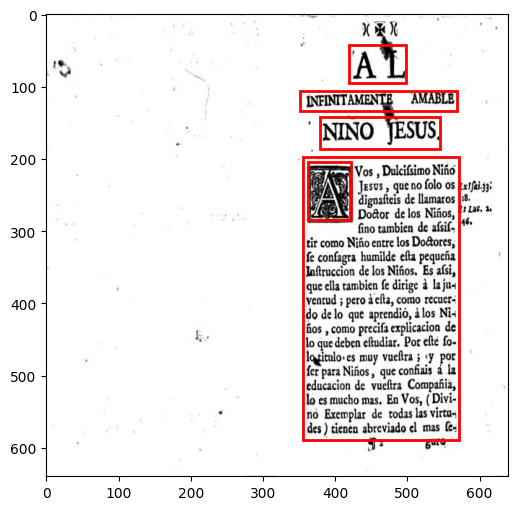

In [7]:
import cv2
import matplotlib.pyplot as plt

def plot_annotated_image(image_path, label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    h, w, _ = image.shape
    with open(label_path, "r") as f:
        annotations = f.readlines()

    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(image)

    for ann in annotations:
        class_id, x, y, width, height = map(float, ann.split())
        x, y, width, height = x * w, y * h, width * w, height * h
        rect = plt.Rectangle((x - width / 2, y - height / 2), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()

image_path = "/content/drive/MyDrive/Layout_Recognition/data/train/images/Buendia-Instruccion_page-0001_jpg.rf.6b730ff8345cb76394fd7f514d7a3eea.jpg"
label_path = "/content/drive/MyDrive/Layout_Recognition/data/train/labels/Buendia-Instruccion_page-0001_jpg.rf.6b730ff8345cb76394fd7f514d7a3eea.txt"
plot_annotated_image(image_path, label_path)


### Installing YOLOv8 (Ultralytics) and PyTorch to set up the training environment.

In [ ]:
!pip install ultralytics torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

### Train the YOLOv8m model with custom hyperparameters and save the best model in Google Drive.

1. **Model Initialization:** The model architecture is initialized using "yolov8m.pt".

2. **Training Results Directory:** The directory `/content/drive/MyDrive/Layout_Recognition/YOLO_results` is created to store training results.

3. **Train the Model with Custom Hyperparameters:**
    * **Dataset:** Loaded from `data.yaml`.
    * **Epochs:** 180 for better learning.
    * **Batch Size:** 8 (to prevent memory issues).
    * **Image Size:** 800x800 (to improve text region detection).
    * **Confidence Threshold (conf):** 0.1 (filters out weak detections).
    * **IoU Threshold (iou):** 0.6 (ensures better overlap accuracy).
    * **Optimizer:** AdamW for efficient training.
    * **Learning Rate (lr0):** 0.003 (prevents overfitting while ensuring steady learning).
    * **Device Selection:** Automatically selects CUDA (GPU) if available; otherwise, uses CPU.
    * **Project Directory:** Saves results under "yolo_vit_finetuned" inside the project directory.

4. **Completion Message:** After training, the script prints "Training Complete" and confirms that the best model weights are saved at: `/content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned/weights/best.pt`

In [ ]:
from ultralytics import YOLO
import torch

model = YOLO('yolov8m.pt')

save_dir = "/content/drive/MyDrive/Layout_Recognition/YOLO_results"
os.makedirs(save_dir, exist_ok=True)

results = model.train(
    data = os.path.join(dataset_path, 'data.yaml'),
    epochs = 180,
    batch=8,
    imgsz=800,
    conf=0.1,
    iou=0.6,
    optimizer="AdamW",
    lr0=0.003,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    project=save_dir,
    name='yolo_vit_finetuned',
    verbose=True
)
print("Training Complete. Model saved to:", os.path.join(save_dir, "weights", "best.pt"))

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Layout_Recognition/data/data.yaml, epochs=180, time=None, patience=100, batch=8, imgsz=800, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/MyDrive/Layout_Recognition/YOLO_results, name=yolo_vit_finetuned, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.1, iou=0.6, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, s

100%|██████████| 755k/755k [00:00<00:00, 140MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 344MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Layout_Recognition/data/train/labels... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [01:07<00:00,  1.30s/it]

train: New cache created: /content/drive/MyDrive/Layout_Recognition/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Layout_Recognition/data/valid/labels... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]

val: New cache created: /content/drive/MyDrive/Layout_Recognition/data/valid/labels.cache


Plotting labels to /content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned/labels.jpg... 
optimizer: AdamW(lr=0.003, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned
Starting training for 180 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/180      5.17G      2.115      4.422      2.126         30        800: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all          3         10       0.25      0.125      0.188       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/180      5.22G      1.706      3.515      1.714         40        800: 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.92it/s]

                   all          3         10      0.515      0.368      0.279      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/180      5.29G       1.59      2.447       1.59         37        800: 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.26it/s]

                   all          3         10     0.0199      0.188    0.00998    0.00436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/180      5.29G      1.566      2.343      1.648         45        800: 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all          3         10      0.255       0.25    0.00713     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/180       5.3G      1.376      2.344      1.532         23        800: 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]

                   all          3         10    0.00775      0.375    0.00897     0.0034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/180      5.37G      1.493      2.888       1.59         17        800: 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.38it/s]

                   all          3         10      0.257      0.125      0.013    0.00367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/180      5.43G      1.486      2.308      1.534         27        800: 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]

                   all          3         10   0.000519     0.0625   0.000326   3.26e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/180       5.5G      1.512      2.064       1.52         33        800: 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


                   all          3         10    0.00269       0.25    0.00289   0.000786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/180       5.5G      1.445      2.184      1.547         23        800: 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]

                   all          3         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/180      5.55G      1.424       2.08      1.611         32        800: 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all          3         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/180      5.79G       1.53      2.043      1.602         43        800: 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all          3         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/180      5.86G      1.381      1.904      1.507         36        800: 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all          3         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/180      5.93G      1.396      1.802      1.474         33        800: 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

                   all          3         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/180      5.93G      1.322      1.754      1.425         39        800: 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all          3         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/180      5.93G      1.258      1.694       1.42         18        800: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all          3         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/180      6.13G      1.296       1.67       1.45         33        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.05it/s]

                   all          3         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/180      6.13G      1.343      1.523      1.429         32        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.36it/s]

                   all          3         10      0.501      0.125    0.00059    5.9e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/180      6.13G      1.261      1.614      1.437         28        800: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


                   all          3         10          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/180       6.2G      1.297      1.519      1.436         24        800: 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

                   all          3         10    0.00412      0.188     0.0073    0.00114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/180      6.42G      1.431      1.668      1.486         29        800: 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.71it/s]

                   all          3         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/180      6.43G      1.167      1.438      1.358         44        800: 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.93it/s]

                   all          3         10    0.00918      0.188    0.00944    0.00234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/180      6.43G       1.38      1.527       1.45         20        800: 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.47it/s]

                   all          3         10    0.00918      0.188    0.00944    0.00234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/180      6.49G      1.361      1.461      1.435         37        800: 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.73it/s]

                   all          3         10      0.255      0.688       0.35     0.0939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/180      6.63G      1.232      1.478      1.369         28        800: 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.03it/s]

                   all          3         10      0.141      0.465       0.16     0.0529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/180      6.63G      1.164       1.39       1.35         35        800: 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]

                   all          3         10      0.124        0.5       0.27      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/180      6.63G      1.059      1.304      1.286         42        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.90it/s]

                   all          3         10      0.892       0.25      0.267      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/180      6.63G      1.191       1.43      1.344         26        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]

                   all          3         10      0.547      0.375      0.318      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/180      6.63G      1.109      1.243      1.277         33        800: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]

                   all          3         10      0.672      0.494      0.578      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/180      6.63G      1.114      1.251      1.309         31        800: 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.42it/s]

                   all          3         10      0.596      0.438       0.48      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/180      6.63G      1.123        1.3      1.286         27        800: 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.92it/s]

                   all          3         10      0.596      0.438       0.48      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/180      6.63G      1.131      1.211       1.23         37        800: 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all          3         10      0.795      0.431      0.413      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/180      6.63G       1.02      1.195       1.21         22        800: 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.98it/s]

                   all          3         10      0.605      0.562      0.375      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/180      6.63G      1.058      1.189      1.315         38        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]

                   all          3         10      0.468      0.303      0.328      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/180      6.63G      1.038      1.128      1.229         20        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

                   all          3         10      0.746      0.375      0.396      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/180      6.63G      1.026      1.083       1.22         43        800: 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]

                   all          3         10      0.257      0.312      0.404      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/180      6.63G     0.9771      1.076      1.214         29        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.88it/s]

                   all          3         10      0.604      0.438      0.405      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/180      6.63G      1.096      1.124      1.211         33        800: 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.78it/s]

                   all          3         10      0.312      0.578      0.427       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/180      6.63G      0.939      0.988       1.21         29        800: 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all          3         10      0.312      0.578      0.427       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/180      6.63G      1.118      1.338      1.288         35        800: 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.93it/s]

                   all          3         10      0.372      0.478      0.432      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/180      6.63G      1.013      1.154      1.213         24        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.26it/s]

                   all          3         10      0.297        0.5      0.361      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/180      6.63G      1.035      1.094       1.23         40        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]

                   all          3         10      0.319      0.688       0.46      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/180      6.63G     0.9838      1.066      1.258         28        800: 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]


                   all          3         10      0.325        0.5      0.431       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/180      6.63G      0.968      1.064      1.213         15        800: 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.23it/s]

                   all          3         10      0.765      0.375      0.463      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/180      6.63G     0.9784      1.016       1.21         15        800: 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.87it/s]

                   all          3         10      0.363       0.54      0.381      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/180      6.63G      0.955     0.9862      1.211         25        800: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]

                   all          3         10      0.209      0.438      0.412      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/180      6.63G     0.9103     0.9464      1.171         22        800: 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.91it/s]

                   all          3         10      0.209      0.438      0.412      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/180      6.63G     0.9372     0.9677      1.181         22        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.60it/s]

                   all          3         10      0.261      0.688      0.418      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/180      6.63G     0.9927      1.047      1.239         25        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.67it/s]

                   all          3         10      0.298      0.688      0.475      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/180      6.63G      1.059     0.9918      1.193         39        800: 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.78it/s]

                   all          3         10      0.493      0.546       0.51      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/180      6.63G     0.9572     0.9837      1.192         43        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.43it/s]

                   all          3         10      0.288      0.562      0.327      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/180      6.63G     0.9193     0.9579      1.151         38        800: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]

                   all          3         10      0.245      0.282      0.225      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/180      6.63G     0.9219      1.017      1.147         33        800: 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]


                   all          3         10      0.661      0.552      0.407      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/180      6.63G     0.9453      1.024      1.212         42        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]

                   all          3         10      0.709      0.586      0.582      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/180      6.63G     0.9087     0.9408      1.164         35        800: 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]

                   all          3         10      0.709      0.586      0.582      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/180      6.63G     0.9477     0.9928      1.147         35        800: 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]

                   all          3         10      0.753      0.598      0.674      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/180      6.63G      1.024      1.057       1.16         33        800: 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]

                   all          3         10      0.625      0.562      0.689      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/180      6.63G     0.9201      1.023      1.155         36        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.15it/s]

                   all          3         10      0.796      0.562      0.605       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/180      6.63G     0.9158     0.9905      1.178         14        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.62it/s]

                   all          3         10      0.335      0.751      0.644      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/180      6.63G     0.9007      0.943      1.173         30        800: 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all          3         10      0.539      0.438      0.529      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/180      6.63G     0.8296     0.8357      1.149         35        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.20it/s]

                   all          3         10      0.565      0.573      0.638      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/180      6.63G     0.9541     0.9575      1.177         25        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.08it/s]

                   all          3         10      0.544      0.655      0.651      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/180      6.63G     0.9091      0.874      1.165         35        800: 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.48it/s]

                   all          3         10      0.544      0.655      0.651      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/180      6.63G     0.9473     0.9706      1.155         38        800: 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all          3         10      0.534        0.5      0.644       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/180      6.63G     0.9386     0.9455      1.136         37        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

                   all          3         10      0.901      0.312       0.52      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/180      6.63G     0.8699     0.8962      1.181         29        800: 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.92it/s]

                   all          3         10      0.626      0.613      0.573        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/180      6.63G     0.8811     0.8617      1.178         33        800: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.83it/s]

                   all          3         10      0.664      0.562      0.685      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/180      6.63G     0.9417     0.9238      1.187         43        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]

                   all          3         10      0.658      0.588      0.672      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/180      6.63G     0.8958     0.8953      1.109         49        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.22it/s]

                   all          3         10      0.718      0.619      0.746      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/180      6.63G     0.8519     0.8251      1.092         34        800: 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]

                   all          3         10      0.528      0.875      0.741       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/180      6.63G     0.8669     0.7958      1.147         25        800: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.64it/s]

                   all          3         10      0.528      0.875      0.741       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/180      6.63G     0.8389     0.8085      1.167         33        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.63it/s]

                   all          3         10      0.656      0.844      0.758      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/180      6.63G     0.8617     0.8888      1.126         23        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.87it/s]

                   all          3         10      0.628      0.972      0.812      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/180      6.63G     0.8294     0.8549      1.108         46        800: 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]


                   all          3         10      0.477          1      0.864      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/180      6.63G     0.9135      0.899      1.168         38        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.10it/s]

                   all          3         10       0.48      0.875      0.837      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/180      6.63G     0.8157     0.8065      1.079         36        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]

                   all          3         10      0.614      0.969       0.87      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/180      6.63G     0.8498     0.9426      1.172         30        800: 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]

                   all          3         10      0.647      0.944      0.912      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/180      6.63G     0.8795     0.8173      1.086         22        800: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]

                   all          3         10      0.534      0.828       0.85       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/180      6.63G     0.8252     0.8258       1.14         20        800: 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.94it/s]

                   all          3         10      0.534      0.828       0.85       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/180      6.63G     0.8409     0.8429      1.134         26        800: 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all          3         10      0.492      0.958      0.829      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/180      6.63G     0.8289     0.7984       1.08         45        800: 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]

                   all          3         10      0.523          1      0.787      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/180      6.63G     0.9365     0.8911      1.166         29        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all          3         10      0.459          1      0.638      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/180      6.63G     0.8504     0.8671      1.179         25        800: 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all          3         10      0.493          1      0.638      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/180      6.63G     0.9173     0.8916      1.151         48        800: 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]

                   all          3         10      0.428      0.875      0.663      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/180      6.63G      0.829     0.7599      1.139         21        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.11it/s]

                   all          3         10      0.502      0.625      0.642      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/180      6.63G     0.7918     0.7344      1.109         36        800: 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.22it/s]

                   all          3         10      0.489      0.828      0.638      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/180      6.63G     0.7672     0.7753      1.076         34        800: 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all          3         10      0.489      0.828      0.638      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/180      6.63G     0.7665     0.7992      1.071         40        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.88it/s]

                   all          3         10        0.5        0.8      0.642      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/180      6.63G     0.7191     0.6812      1.069         44        800: 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]

                   all          3         10      0.586       0.55      0.752      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/180      6.63G     0.7776     0.7298      1.086         23        800: 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]

                   all          3         10      0.656      0.633      0.752       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/180      6.63G     0.7731     0.7343      1.097         16        800: 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.97it/s]

                   all          3         10      0.704       0.81      0.864       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/180      6.63G     0.7537     0.7076      1.068         35        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.08it/s]

                   all          3         10       0.69      0.868      0.933      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/180      6.63G     0.7799     0.7769      1.132         17        800: 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]

                   all          3         10      0.821      0.855      0.933      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/180      6.63G     0.7708     0.7395      1.096         37        800: 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all          3         10      0.777      0.994      0.953      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/180      6.63G     0.7746     0.7083      1.088         24        800: 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.76it/s]

                   all          3         10      0.777      0.994      0.953      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/180      6.63G     0.7699     0.7092      1.069         32        800: 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all          3         10      0.917      0.795      0.934      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/180      6.63G      0.818     0.7589      1.057         47        800: 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.58it/s]

                   all          3         10      0.834      0.813      0.934      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/180      6.63G     0.7808     0.7596      1.124         23        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.38it/s]

                   all          3         10      0.754      0.942      0.953      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/180      6.63G     0.7267     0.6596      1.083         33        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.22it/s]

                   all          3         10      0.807      0.958      0.953      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/180      6.63G     0.7949      0.722       1.12         24        800: 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.84it/s]

                   all          3         10      0.735      0.988      0.953      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/180      6.63G     0.7938     0.7238      1.128         17        800: 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.34it/s]

                   all          3         10      0.679      0.867      0.953      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/180      6.63G     0.7652     0.7418      1.067         32        800: 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]

                   all          3         10      0.671      0.875      0.902      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/180      6.63G      0.788     0.7282      1.089         31        800: 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all          3         10      0.671      0.875      0.902      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/180      6.63G     0.7951     0.7755      1.072         41        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.66it/s]

                   all          3         10      0.751      0.875      0.902      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/180      6.63G     0.8284     0.8305      1.151         35        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.65it/s]

                   all          3         10      0.854      0.875      0.902      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/180      6.63G     0.7794     0.7409      1.138         21        800: 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all          3         10      0.773      0.875      0.891      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/180      6.63G      0.744     0.6913      1.047         50        800: 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all          3         10       0.74      0.875      0.886      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/180      6.63G     0.7146     0.6654      1.015         31        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.62it/s]

                   all          3         10      0.653      0.875      0.796      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/180      6.63G     0.7759     0.7322      1.092         32        800: 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]

                   all          3         10      0.617      0.875        0.8      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/180      6.63G     0.7626     0.7421      1.089         29        800: 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.93it/s]

                   all          3         10        0.6       0.75       0.72      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/180      6.63G     0.7533     0.7173      1.094         34        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.02it/s]

                   all          3         10        0.6       0.75       0.72      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/180      6.63G     0.7891     0.7522      1.091         39        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]

                   all          3         10      0.694       0.75      0.839      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/180      6.63G     0.7609     0.7228      1.071         33        800: 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all          3         10      0.693       0.75      0.829      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/180      6.63G     0.7218     0.6643      1.045         23        800: 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.94it/s]

                   all          3         10      0.692       0.75      0.811      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/180      6.63G     0.7446     0.6774      1.087         16        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.88it/s]

                   all          3         10      0.656       0.75      0.811      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/180      6.63G     0.7967     0.7139      1.133         39        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.73it/s]

                   all          3         10      0.585       0.75      0.823      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/180      6.63G     0.6888     0.6612      1.054         23        800: 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.04it/s]

                   all          3         10      0.605       0.75      0.823      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/180      6.63G     0.7288     0.6427       1.06         41        800: 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.23it/s]

                   all          3         10       0.61      0.973      0.796      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/180      6.63G     0.7977     0.7388      1.075         46        800: 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]

                   all          3         10       0.61      0.973      0.796      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/180      6.63G     0.7189     0.6579      1.075         33        800: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all          3         10      0.641       0.95      0.796      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/180      6.63G     0.7691     0.7023      1.108         21        800: 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.96it/s]

                   all          3         10       0.64      0.875      0.808      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/180      6.63G     0.6852     0.6309      1.051         41        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all          3         10      0.657      0.875      0.808      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/180      6.63G     0.6792     0.6353      1.093         19        800: 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.08it/s]

                   all          3         10      0.679      0.875       0.87      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/180      6.63G     0.7105     0.6937      1.078         28        800: 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.74it/s]

                   all          3         10      0.896      0.959      0.953      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/180      6.63G     0.7263     0.6696      1.052         29        800: 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.42it/s]

                   all          3         10      0.773          1      0.953      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/180      6.63G     0.7976     0.7639      1.078         54        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.15it/s]

                   all          3         10      0.816      0.957      0.953      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/180      6.63G      0.716     0.6633      1.046         46        800: 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all          3         10      0.816      0.957      0.953      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/180      6.63G      0.768     0.6981      1.084         24        800: 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.46it/s]

                   all          3         10       0.98      0.976      0.995       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/180      6.63G     0.7054     0.6769      1.121         25        800: 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.00it/s]

                   all          3         10      0.872      0.985      0.953      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/180      6.63G     0.6977     0.6223      1.086         42        800: 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.05it/s]

                   all          3         10      0.907       0.97      0.953      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/180      6.63G     0.6637     0.6185      1.041         15        800: 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]

                   all          3         10      0.833          1      0.933      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/180      6.63G     0.7389     0.6676      1.078         21        800: 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.69it/s]

                   all          3         10      0.907      0.972      0.953      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/180      6.63G     0.6731     0.6352      1.028         37        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

                   all          3         10      0.874          1      0.953      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/180      6.63G     0.7783     0.6968      1.074         51        800: 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]

                   all          3         10      0.902          1      0.995       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/180      6.63G     0.7115      0.619      1.035         58        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.78it/s]

                   all          3         10      0.902          1      0.995       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/180      6.63G     0.6861     0.6149      1.025         40        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.86it/s]

                   all          3         10        0.9          1      0.953      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/180      6.63G     0.6653     0.5995      1.038         29        800: 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all          3         10      0.846          1      0.995      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/180      6.63G     0.6866     0.6316      1.065         45        800: 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]

                   all          3         10      0.863          1      0.995        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/180      6.63G     0.6652     0.5776      1.026         41        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.02it/s]

                   all          3         10      0.905          1      0.995      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/180      6.63G      0.723     0.6365      1.045         35        800: 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all          3         10       0.93          1      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/180      6.63G     0.7024     0.6641      1.044         29        800: 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.63it/s]

                   all          3         10      0.904          1      0.995       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/180      6.63G     0.7392     0.7276      1.099         38        800: 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.64it/s]

                   all          3         10      0.908          1      0.995      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/180      6.63G     0.6321     0.5707      1.011         24        800: 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]

                   all          3         10      0.908          1      0.995      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/180      6.63G     0.6456     0.5852      1.032         53        800: 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]

                   all          3         10       0.93          1      0.995      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/180      6.63G     0.6553     0.6112      1.032         44        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.83it/s]

                   all          3         10      0.917          1      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/180      6.63G     0.6586     0.5787      1.027         38        800: 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.60it/s]

                   all          3         10      0.862          1      0.953      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/180      6.63G     0.6424      0.573      1.013         35        800: 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]


                   all          3         10      0.853      0.983      0.953      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/180      6.63G     0.6516     0.6039      1.062         18        800: 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.82it/s]

                   all          3         10      0.858      0.964      0.953      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/180      6.63G     0.6214     0.5541      1.002         40        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.88it/s]

                   all          3         10      0.773      0.985      0.912        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/180      6.63G     0.6157     0.5843      1.041         37        800: 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

                   all          3         10      0.786      0.989      0.912      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/180      6.63G     0.6674     0.5874      1.036         24        800: 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.42it/s]

                   all          3         10      0.786      0.989      0.912      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/180      6.63G     0.6541     0.5697      1.027         25        800: 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

                   all          3         10      0.787          1      0.891      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/180      6.63G     0.6693     0.6229      1.041         51        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.02it/s]

                   all          3         10      0.787          1      0.891      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/180      6.63G     0.6714     0.6301      1.047         36        800: 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.13it/s]

                   all          3         10       0.81          1      0.933      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/180      6.63G     0.6377     0.5766      1.062         22        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]

                   all          3         10      0.796          1      0.933      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/180      6.63G     0.6371     0.5645      1.011         42        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.51it/s]

                   all          3         10      0.782          1      0.933      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/180      6.63G     0.6603     0.5687      1.055         26        800: 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all          3         10      0.822          1      0.933      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/180      6.63G      0.644     0.5724      1.047         17        800: 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.02it/s]

                   all          3         10      0.814          1      0.933      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/180      6.63G     0.6088     0.5714      1.033         38        800: 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]

                   all          3         10      0.814          1      0.933      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/180      6.63G      0.644     0.5833      1.029         52        800: 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]

                   all          3         10      0.879      0.865       0.92      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/180      6.63G     0.6369      0.571      1.043         42        800: 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.16it/s]

                   all          3         10      0.894      0.853       0.92      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/180      6.63G      0.628     0.5736       1.06         30        800: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]

                   all          3         10      0.902       0.85       0.92      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/180      6.63G     0.6261     0.5687      1.027         34        800: 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.62it/s]

                   all          3         10      0.897      0.863       0.92      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/180      6.63G     0.6563     0.5955      1.046         39        800: 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.23it/s]

                   all          3         10      0.889       0.86       0.92      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/180      6.63G     0.6447      0.565      1.023         26        800: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.99it/s]

                   all          3         10      0.895      0.857      0.912      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/180      6.63G     0.6328     0.5481      1.038         43        800: 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.07it/s]

                   all          3         10      0.903      0.849      0.912      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/180      6.63G     0.6569     0.5646      1.019         31        800: 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.01it/s]

                   all          3         10      0.903      0.849      0.912      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/180      6.63G     0.5796     0.5296     0.9754         17        800: 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all          3         10      0.923      0.829      0.912      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/180      6.63G     0.6423     0.5682      1.044         19        800: 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.70it/s]

                   all          3         10      0.833          1      0.912      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/180      6.63G     0.6155     0.5625      1.048         29        800: 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.93it/s]

                   all          3         10      0.833          1      0.912      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/180      6.63G     0.6048     0.5483      1.012         40        800: 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.42it/s]

                   all          3         10      0.833          1       0.92      0.748


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/180      6.63G     0.6079      0.573      1.082         13        800: 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.50it/s]

                   all          3         10      0.867      0.975      0.933      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/180      6.63G     0.6297     0.5755      1.041          9        800: 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.39it/s]

                   all          3         10       0.87      0.985      0.933      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/180      6.63G     0.6286     0.5789      1.047         15        800: 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

                   all          3         10      0.863          1      0.933      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/180      6.63G     0.6209     0.5389      1.068         13        800: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]

                   all          3         10      0.863          1      0.933      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/180      6.63G     0.6377     0.5481      1.058         19        800: 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.70it/s]

                   all          3         10      0.867          1      0.933      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/180      6.63G     0.6093     0.5131      1.058         14        800: 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all          3         10      0.889      0.983      0.953      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/180      6.63G     0.5956     0.5304      1.036         24        800: 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]

                   all          3         10      0.896      0.982      0.953      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/180      6.63G     0.5616     0.4865      1.045         12        800: 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.72it/s]

                   all          3         10      0.896      0.985      0.953      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/180      6.63G     0.5873      0.509      1.018         22        800: 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.34it/s]

                   all          3         10      0.901      0.985      0.953      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/180      6.63G     0.5397     0.4624     0.9711         19        800: 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]

                   all          3         10      0.911      0.977      0.953      0.721



180 epochs completed in 0.205 hours.
Optimizer stripped from /content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned/weights/last.pt, 52.1MB
Optimizer stripped from /content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned/weights/best.pt, 52.1MB

Validating /content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]


                   all          3         10      0.898      0.862       0.92      0.772
                author          1          2          1       0.95      0.995      0.821
              drop_cap          2          2          1          1      0.995      0.895
               heading          2          2      0.749        0.5      0.695      0.417
             main_text          3          4      0.842          1      0.995      0.955
Speed: 0.4ms preprocess, 24.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned
Training Complete. Model saved to: /content/drive/MyDrive/Layout_Recognition/YOLO_results/weights/best.pt


### Using the trained model to predict on a specific test images and save the results.

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!yolo task=detect mode=predict \
    model="/content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned/weights/best.pt" \
    conf=0.1 \
    source="/content/drive/MyDrive/Layout_Recognition/data/test/images" \
    save=True \
    project="/content/drive/MyDrive/Layout_Recognition/YOLO_results" \
    name="predictions" \
    exist_ok=True

prediction_folder = "/content/drive/MyDrive/Layout_Recognition/YOLO_results/predictions"

print("\n Listing all saved predictions:")
print(os.listdir(prediction_folder))

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs

image 1/3 /content/drive/MyDrive/Layout_Recognition/data/test/images/Constituciones-sinodales-Calahorra-1602_page-0006_jpg.rf.bab9f65804bbbaddc79dd361bd7f48c3.jpg: 800x800 1 drop_cap, 1 heading, 4 main_texts, 58.8ms
image 2/3 /content/drive/MyDrive/Layout_Recognition/data/test/images/Copy_Buendia-Instruccion_page-0006_jpg.rf.ef9b0a162d7ef1384ebaaf4a41bea7d4.jpg: 800x800 3 authors, 4 drop_caps, 6 headings, 5 main_texts, 42.2ms
image 3/3 /content/drive/MyDrive/Layout_Recognition/data/test/images/Mendo-Principe-perfecto_page-0003_jpg.rf.3c9ddff757467e60c7cca6a8584d5ab1.jpg: 800x800 1 drop_cap, 5 headings, 5 main_texts, 42.1ms
Speed: 5.5ms preprocess, 47.7ms inference, 54.8ms postprocess per image at shape (1, 3, 800, 800)
Results saved to /content/drive/MyDrive/Layout_Recognition/YOLO_results/predictions
💡 Learn more at https:

### Displaying a Prediction Result

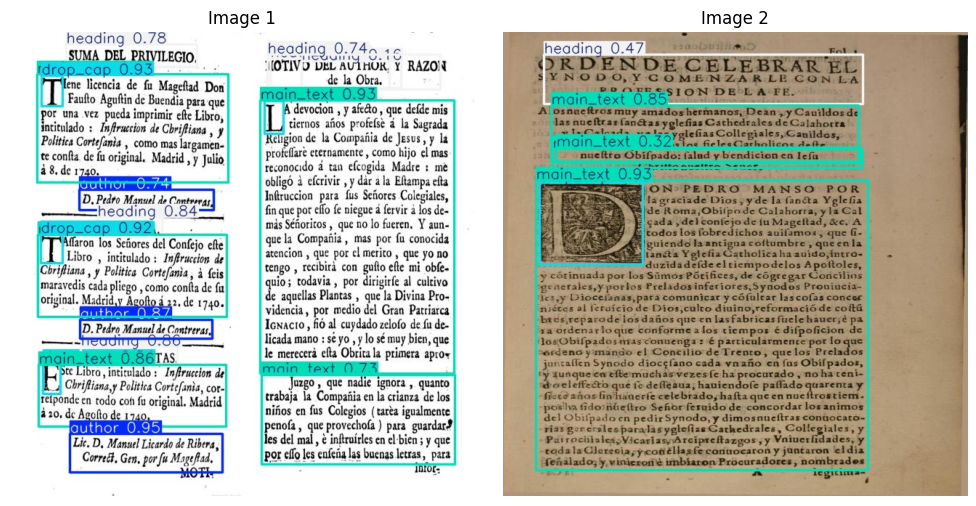

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

image1 = Image.open('/content/drive/MyDrive/Layout_Recognition/YOLO_results/predictions/Copy_Buendia-Instruccion_page-0006_jpg.rf.ef9b0a162d7ef1384ebaaf4a41bea7d4.jpg')
image2 = Image.open('/content/drive/MyDrive/Layout_Recognition/YOLO_results/predictions/Constituciones-sinodales-Calahorra-1602_page-0006_jpg.rf.bab9f65804bbbaddc79dd361bd7f48c3.jpg')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image1)
axes[0].axis('off')
axes[0].set_title('Image 1')

axes[1].imshow(image2)
axes[1].axis('off')
axes[1].set_title('Image 2')

plt.tight_layout()
plt.show()

###  Insights from the Predicted Images  

#### 1 Text Region Detection  
- The model successfully detects key text components (headings, main text, drop caps, author names).  
- Bounding boxes highlight document structure, aiding layout identification.  

#### 2 Accuracy and Confidence Scores  
- Each detected region has a confidence score (e.g., heading: 0.78, main_text: 0.85).  
- Main text segmentation is good, but some headings have lower confidence, suggesting room for improvement.  

#### 3 Challenges and Observations  
- Drop caps are detected well, but smaller headings may need more training data or adjusted thresholds.  
- Dense layouts in older documents pose segmentation challenges.  

#### 4 Usefulness for Layout Recognition  
- Predictions aid automated document processing, improving OCR by separating text from embellishments.  
- Detected layout improves text extraction accuracy from historical documents.  



##  Evaluating the Model  

- Loads the trained YOLOv8 model and runs validation.  
- Extracts key metrics: **Precision, Recall, mAP@0.5, mAP@0.5:0.95**.  
- Prints results for performance analysis.  
- Checks if the model exists; shows an error if missing.

In [ ]:
model_path = "/content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned/weights/best.pt"

if os.path.exists(model_path):
    print(" Model found. Running evaluation...")

    model = YOLO(model_path)

    eval_results = model.val()

    print("\n Available keys in results_dict:", eval_results.results_dict.keys())

    precision = eval_results.results_dict.get("metrics/precision(B)", "N/A")
    recall = eval_results.results_dict.get("metrics/recall(B)", "N/A")
    map_50 = eval_results.results_dict.get("metrics/mAP50(B)", "N/A")
    map_50_95 = eval_results.results_dict.get("metrics/mAP50-95(B)", "N/A")

    print("\n Evaluation Metrics:")
    print(f" Precision: {precision if precision != 'N/A' else 'Not Found'}")
    print(f" Recall: {recall if recall != 'N/A' else 'Not Found'}")
    print(f" mAP@0.5: {map_50 if map_50 != 'N/A' else 'Not Found'}")
    print(f" mAP@0.5:0.95: {map_50_95 if map_50_95 != 'N/A' else 'Not Found'}")

else:
    print(" Model file not found. Check if the training was completed and saved correctly.")

 Model found. Running evaluation...
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/Layout_Recognition/data/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


                   all          3         10      0.854      0.863      0.912      0.759
                author          1          2          1       0.95      0.995      0.798
              drop_cap          2          2      0.831          1      0.995      0.895
               heading          2          2      0.745        0.5      0.662      0.397
             main_text          3          4      0.841          1      0.995      0.947
Speed: 0.5ms preprocess, 55.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val

 Available keys in results_dict: dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])

 Evaluation Metrics:
 Precision: 0.854298720240413
 Recall: 0.8626171953169884
 mAP@0.5: 0.9116666666666667
 mAP@0.5:0.95: 0.7592153571428572


###  Insights from Model Evaluation  

### 🔹 Overall Performance  
- The model achieved **high precision (0.85)** and **recall (0.86)**, indicating reliable detection of relevant text regions.  
- **mAP@0.5: 0.91** suggests strong localization accuracy at a 50% IoU threshold.  
- **mAP@0.5:0.95: 0.76** indicates consistent detection performance across varying IoU levels.  

### 🔹 Class-wise Analysis  
- **Main text and drop caps** were detected with high confidence (**0.99 mAP@0.5**), showing the model’s robustness in segmenting large text blocks.  
- **Headings (mAP@0.5: 0.66)** had a lower score, suggesting some misclassification or missed detections.  
- **Author detection (mAP@0.5: 0.79)** performed well but could benefit from additional training samples.  

### 🔹 Key Observations  
- The **high recall** suggests minimal missed detections.  
- **Precision is balanced**, meaning the model avoids excessive false positives.  
- **Speed is optimized**, running inference at **~55.6ms per image**, making it suitable for large-scale processing.  

### Plotting Box Loss & Class Loss over epochs to visualize the training process.

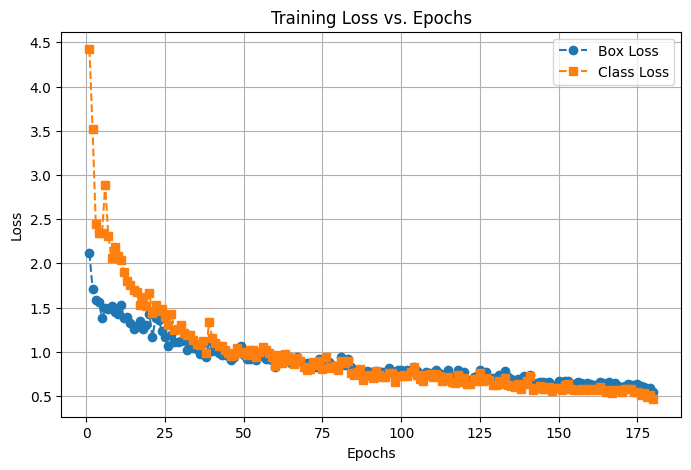

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results_path = "/content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned/results.csv"
df = pd.read_csv(results_path)

plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['train/box_loss'], label="Box Loss", linestyle='dashed', marker='o')
plt.plot(df['epoch'], df['train/cls_loss'], label="Class Loss", linestyle='dashed', marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs. Epochs")
plt.legend()
plt.grid()
plt.show()

##  Training Loss Analysis  

### 🔹 Key Observations  
- **Box Loss and Class Loss** decrease steadily over epochs, indicating effective learning.  
- Initial loss is high due to random weight initialization but stabilizes after **~50 epochs**.  
- **Final loss values (~0.5)** suggest good convergence without severe overfitting.  

### 🔹 Insights  
- The model is effectively learning object localization (**Box Loss**) and classification (**Class Loss**) over time.  
- The plateau in later epochs implies **diminishing returns**, meaning additional training may not yield significant improvements.  
- No sharp spikes, suggesting **stable training without sudden divergence**.

### Plotting mAP@0.5 & mAP@0.5:0.95 trends to track detection accuracy improvements over training.

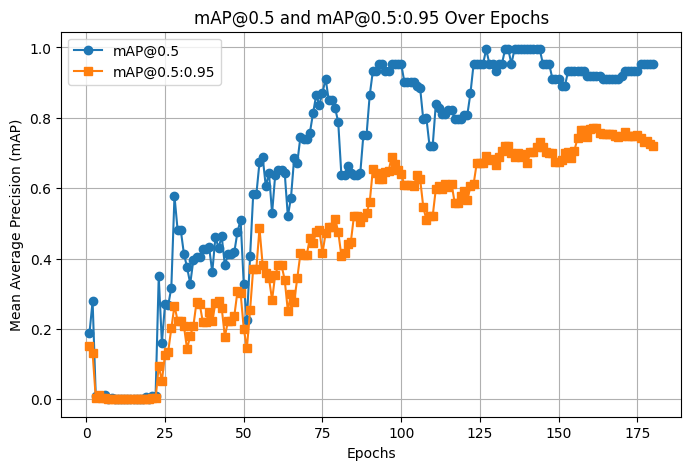

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label="mAP@0.5", marker='o')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label="mAP@0.5:0.95", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Mean Average Precision (mAP)")
plt.title("mAP@0.5 and mAP@0.5:0.95 Over Epochs")
plt.legend()
plt.grid()
plt.show()

 ### 🔹 Key Observations  
- **mAP@0.5** improves significantly after **~30 epochs**, reaching nearly **1.0** in later epochs.  
- **mAP@0.5:0.95** shows steady growth but remains lower, stabilizing around **0.7-0.8**.  
- Early fluctuations suggest the model needed more training to generalize properly.  

### 🔹 Insights  
- **High mAP@0.5** indicates strong detection ability when using a relaxed IoU threshold.  
- **Lower mAP@0.5:0.95** suggests detecting objects with stricter IoU thresholds remains challenging.  
- The model achieves good precision-recall balance over time.  

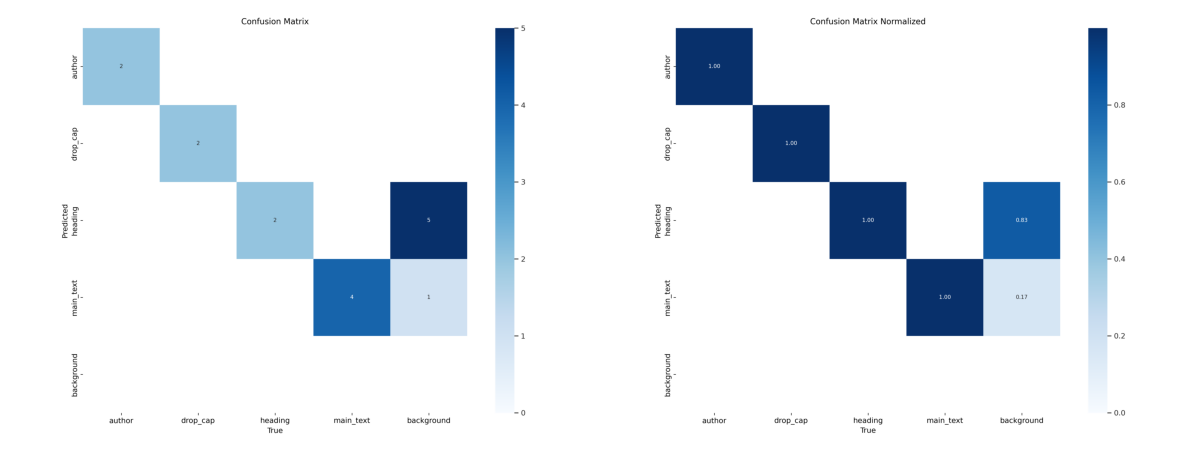

In [ ]:
cm = Image.open('/content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned/confusion_matrix.png')
normalized_cm = Image.open('/content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned/confusion_matrix_normalized.png')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(cm)
axes[0].axis('off')

axes[1].imshow(normalized_cm)
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 🔹 Key Observations  
- The **left matrix** shows raw predictions, while the **right matrix** is normalized.  
- **Strong diagonal values** indicate high accuracy for most classes (author, drop cap, heading, main text).  
- **Background misclassification** is present, with one false positive detected as main text.  

### 🔹 Insights  
- The model performs **well** in distinguishing major text elements.  
- Some confusion occurs between **main text and background**, suggesting minor false positives.  
- **Perfect classification** for author, drop cap, and heading categories.

### Plotting Precision and Recall Confidence curve

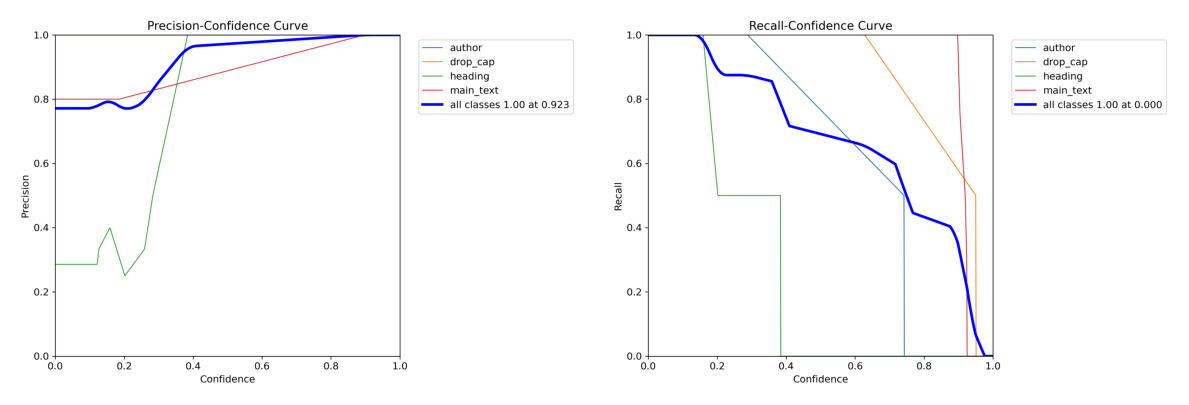

In [ ]:
P_curve = Image.open('/content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned/P_curve.png')
R_curve = Image.open('/content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned/R_curve.png')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(P_curve)
axes[0].axis('off')

axes[1].imshow(R_curve)
axes[1].axis('off')

plt.tight_layout()
plt.show()

#### 🔹 **Precision-Confidence Curve (Left)**  
- Precision remains high across most confidence levels.  
- The **blue line** (all classes) achieves **perfect precision** at a confidence of 0.923.  
- **Heading class (green line)** shows fluctuating precision at lower confidence levels, indicating some misclassifications.  

#### 🔹 **Recall-Confidence Curve (Right)**  
- **Recall declines** as confidence increases, meaning fewer false positives but more missed detections.  
- **Drop cap and heading classes struggle** at low confidence thresholds, suggesting further fine-tuning is needed.  
- **Main text detection is stable**, but minor recall loss occurs at high confidence values.

#### Displaying the results of all metrics.

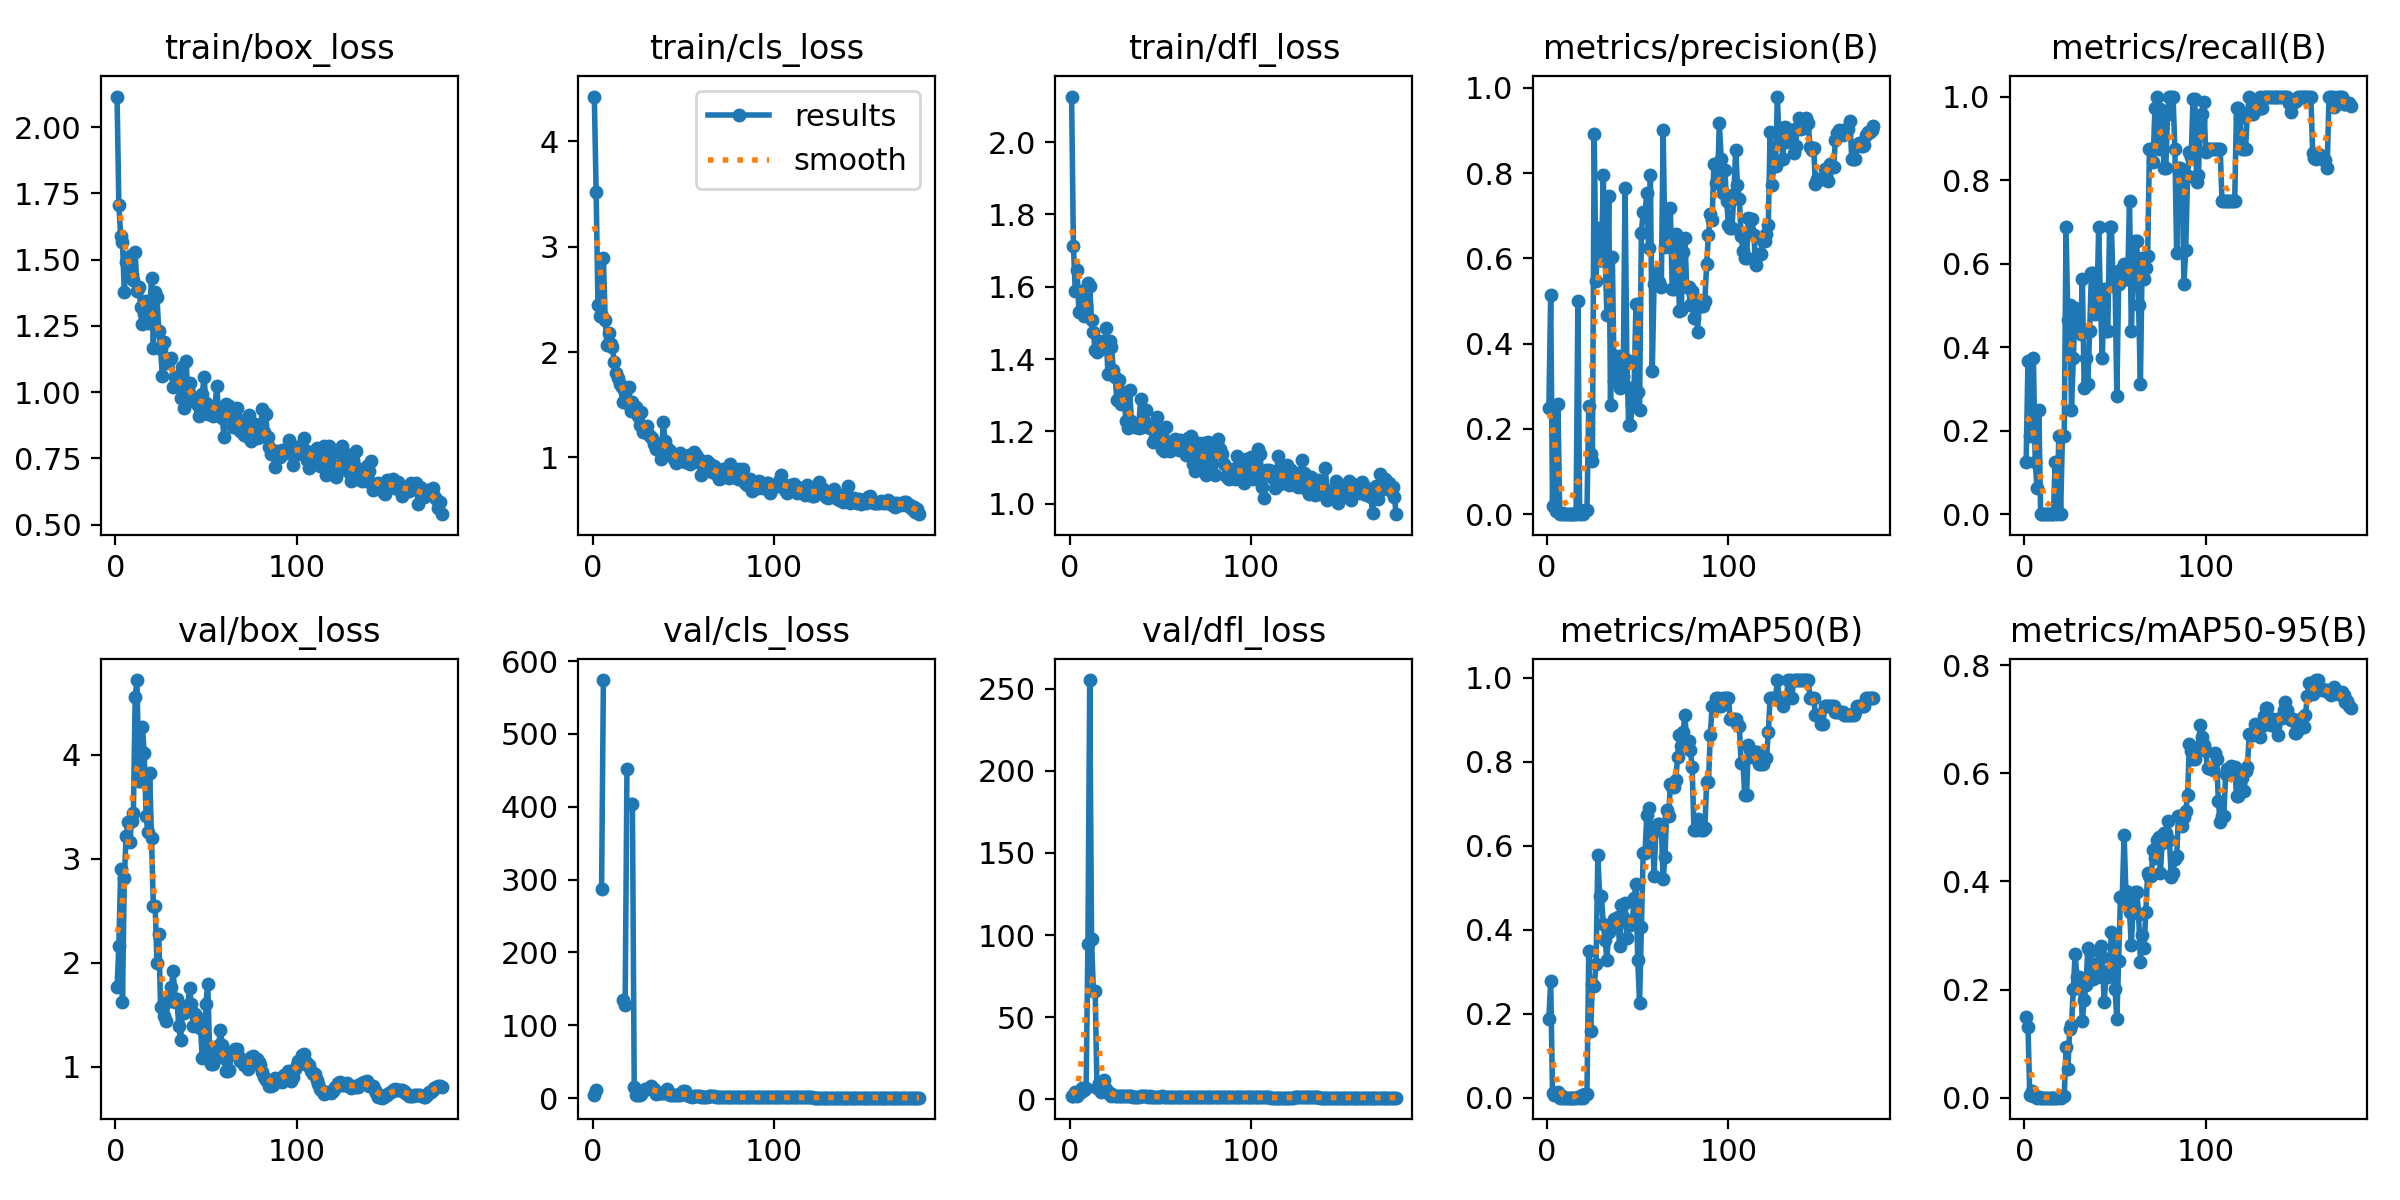

In [ ]:
res = Image.open('/content/drive/MyDrive/Layout_Recognition/YOLO_results/yolo_vit_finetuned/results.png')
display(res)

##3 Training & Validation Metrics Analysis  

### 🔹 **Loss Curves (Top Row - Left)**
- **Box Loss, Classification Loss, and DFL Loss** steadily decrease, showing successful learning.  
- The **smooth trend line** suggests the model stabilizes well after initial epochs.  

### 🔹 **Precision & Recall Trends (Top Row - Right)**
- **Precision** fluctuates in the early epochs but improves consistently after **epoch 50**.  
- **Recall steadily increases**, indicating the model's ability to detect more relevant objects.  

### 🔹 **Validation Loss & Performance (Bottom Row)**
- **Validation losses drop significantly**, confirming reduced overfitting.  
- **mAP@0.5 and mAP@0.5:0.95 improve over time**, peaking near **0.8**, demonstrating strong detection accuracy.  

###  **Key Takeaways**
✔ **Good model convergence** with minimal overfitting.  
✔ **Improved recall & precision**, leading to better layout recognition.  
✔ **Fine-tuning may help optimize classification further.**  

- The model shows **strong performance** with **mAP@0.5 = 91%**, **precision = 85%**, and **recall = 86%**.  

- **Headings and author labels** have some misclassifications, and **mAP@0.5:0.95 = 76%** suggests room for improvement in handling varying text layouts.  

### 🔹 Next Steps for Improvement:  
- Increase **dataset size** (*currently 52 images*) and apply **stronger augmentation** (rotation, shearing, perspective).  
- Fine Tune **confidence threshold ** and adjust **IoU (0.65-0.7)** to refine detections.  
- Use **OCR post-processing** to analyze text extraction accuracy.  
- Experiment with **YOLOv8L or YOLOv8X** for better feature extraction.  

- The model is **ready for submission** but could benefit from **fine-tuning heading recognition and optimizing threshold settings**.